Name
Name of the species in the IUCN red list

EX
EX stands for extinct species

EW
EW stands for extinct in the wild species

Subtotal (EX+EW)
Total of both extinct and extinct in the wild species

CR(PE)
Critically endangered species which are possibly extinct

CR(PEW)
Critically endangered species which are possibly extinct in the wild

Subtotal (EX+EW+ CR(PE)+CR(PEW))
Total sum of EX+EW+ CR(PE)+CR(PEW)

CR
CR stands for critically endangered species

EN
EN stands for endangered species

VU
VU stands for vulnerable species

Subtotal (threatened spp.)
The subtotal of threatened species

LR/cd
LR/cd stands for lower risk/conservation dependent

NT or LR/nt
Near threatened (includes LR/nt - lower risk/near threatened)

LC or LR/lc
Least concern (includes LR/lc - lower risk/least concern)

DD
DD stands for data deficient

Total
The final total count value of each respective rows

In [989]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [990]:
rawDF = pd.read_csv("Species.csv")

#This is the syntax chatGPT suggested to remove the last row
rawDF = rawDF.iloc[:-1]

rawDF.tail()

,Name,EX,EW,Subtotal (EX+EW),CR(PE),CR(PEW),Subtotal (EX+EW+ CR(PE)+CR(PEW)),CR,EN,VU,Subtotal (threatened spp.),LR/cd,NT or LR/nt,LC or LR/lc,DD,Total
62,POLYPODIOPSIDA,2,1,3,8,0,11,66,88,84,238,0,37,265,80,623
63,POLYTRICHOPSIDA,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
64,SPHAGNOPSIDA,0,0,0,0,0,0,1,2,2,5,0,0,1,0,6
65,TAKAKIOPSIDA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
66,ULVOPHYCEAE,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [991]:
animalGroup = rawDF.groupby("Name").size()
animalGroup

Name
ACTINOPTERYGII       1
AGARICOMYCETES       1
AMPHIBIA             1
ANDREAEOPSIDA        1
ANTHOCEROTOPSIDA     1
                    ..
TAKAKIOPSIDA         1
TURBELLARIA          1
UDEONYCHOPHORA       1
ULVOPHYCEAE          1
USTILAGINOMYCETES    1
Length: 67, dtype: int64

In [992]:
#CHATGPT HELPED ME WITH THIS SYNTAX
filteredDF = rawDF[rawDF["EX"] != 0]
filteredDF.head()


,Name,EX,EW,Subtotal (EX+EW),CR(PE),CR(PEW),Subtotal (EX+EW+ CR(PE)+CR(PEW)),CR,EN,VU,Subtotal (threatened spp.),LR/cd,NT or LR/nt,LC or LR/lc,DD,Total
0,ACTINOPTERYGII,79,10,89,122,6,217,626,"1,000","1,241","2,867",0,630,"13,064","4,356","21,006"
1,AMPHIBIA,35,2,37,146,1,184,663,"1,060",721,"2,444",0,421,"3,129","1,184","7,215"
3,ARACHNIDA,9,0,9,21,0,30,68,88,62,218,0,20,91,55,393
5,AVES,159,5,164,22,0,186,223,460,798,"1,481",0,"1,001","8,460",52,"11,158"
6,BIVALVIA,32,0,32,15,0,47,83,68,60,211,4,56,339,170,812


VISUALIZATION #1

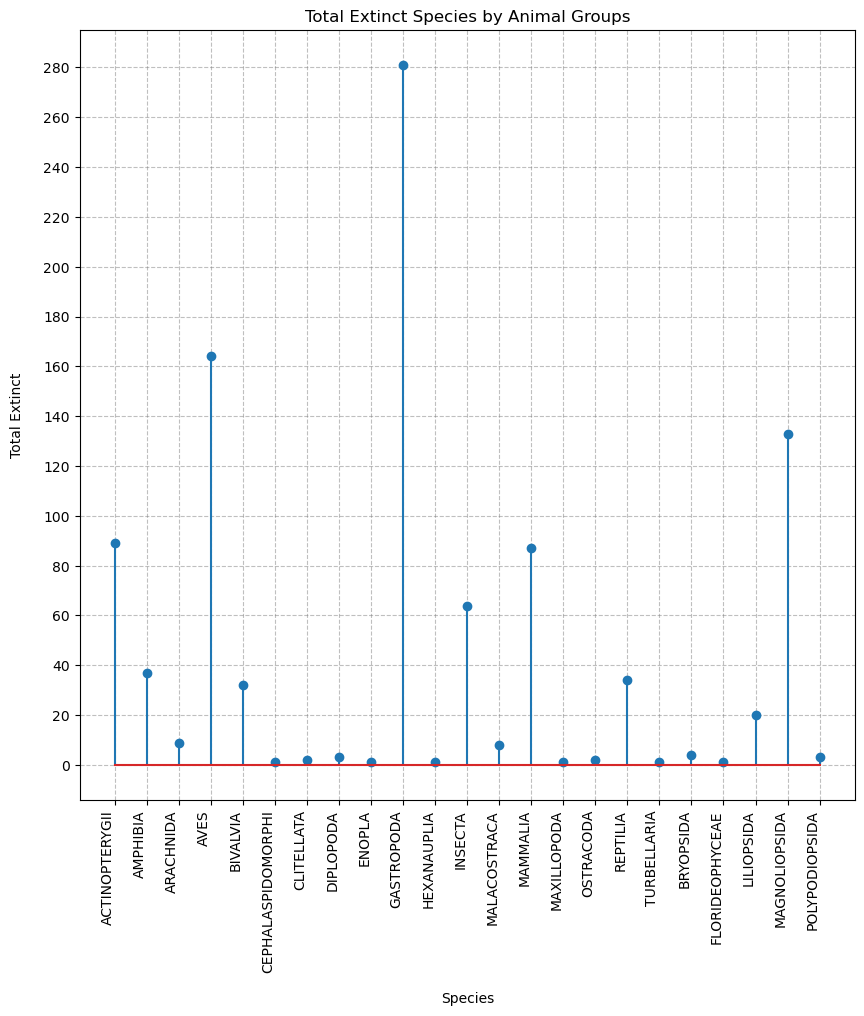

In [993]:
#CREDIT TO https://www.youtube.com/watch?v=0P7QnIQDBJY&list=RDCMUCq6XkhO5SZ66N04IcPbqNcw&index=2
#CHATGPT HELPED ME FORMAT AND WRITE THIS PORTION OF CODE
species = filteredDF["Name"]
values = filteredDF["EX"] + filteredDF["EW"]

fig, ax = plt.subplots(figsize=(10,10))

ax.stem(species, values)

#Setting titles and labels
ax.set_xlabel("Species", labelpad=14)
ax.set_ylabel("Total Extinct", labelpad=14)
ax.set_title("Total Extinct Species by Animal Groups")

#Adjusting x and y labels
plt.yticks(range(0, max(values) + 1, 20))
plt.xticks(rotation=90, ha='right')
ax.grid(True, linestyle='--', color='gray', alpha=0.5)

plt.show()

VISUALIZATION #2

<Figure size 1000x1000 with 0 Axes>

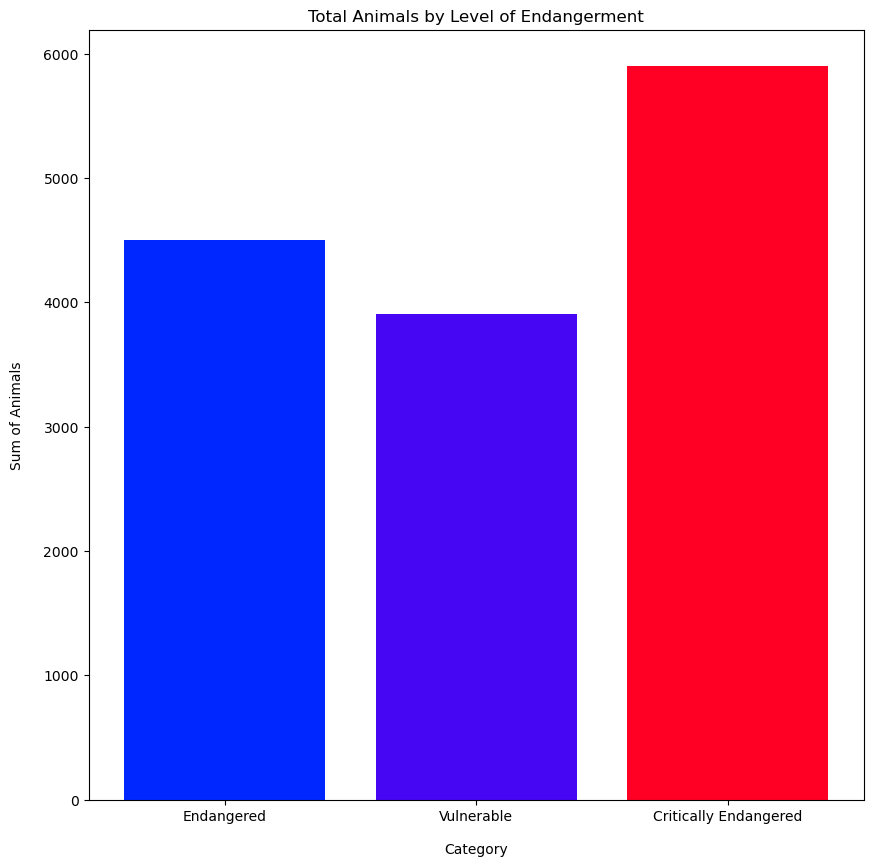

In [994]:
#CHATGPT HELPED ME CHECK OVER THIS CODE I WAS HAVING PROBLEM WITH THE SUM
#IT HELPED ME FIX IT BY CONVERTING THE COLUMNS TO NUMERIC VALUES

plt.figure(figsize=(10,10))

#Next 3 Lines from ChatGPT for conversion
rawDF["CR"] = pd.to_numeric(rawDF["CR"], errors="coerce")
rawDF["EN"] = pd.to_numeric(rawDF["EN"], errors="coerce")
rawDF["VU"] = pd.to_numeric(rawDF["VU"], errors="coerce")

critEndangerdSum = rawDF["CR"].sum()
endangeredSum = rawDF["EN"].sum()
vulnerableSum = rawDF["VU"].sum()

colors = ["#0027FF","#4606F3","#FF0024"]
labels = ["Endangered", "Vulnerable", "Critically Endangered"]
categories = [critEndangerdSum, endangeredSum, vulnerableSum]

plt.figure(figsize=(10,10))
plt.bar(labels, categories, color = colors)

plt.xlabel("Category", labelpad=14)
plt.ylabel("Sum of Animals", labelpad=14)
plt.title("Total Animals by Level of Endangerment")

plt.show()

#print(endangeredSum)

<Figure size 1000x1000 with 0 Axes>

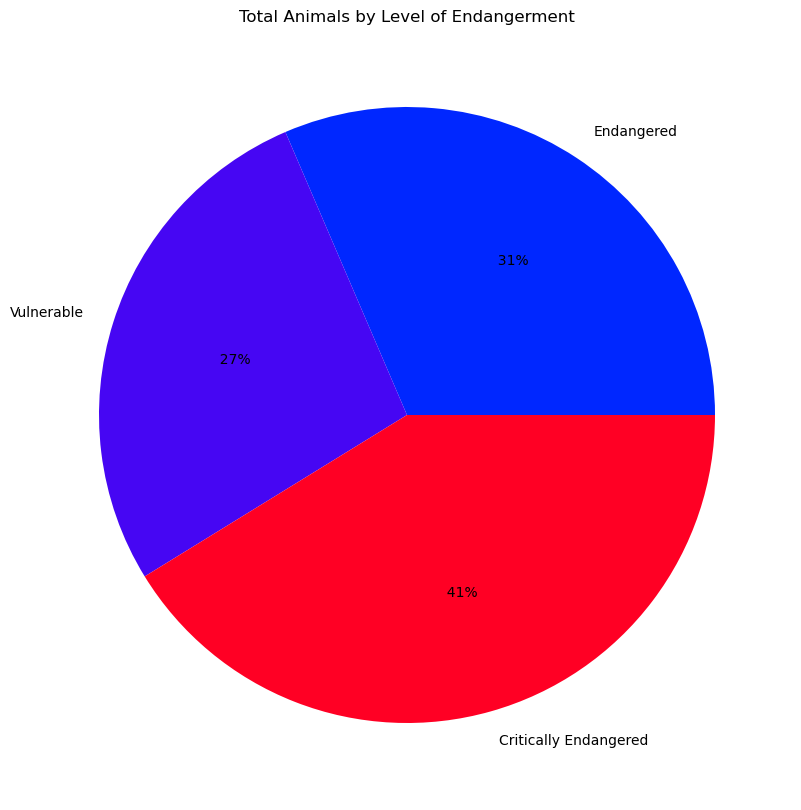

In [995]:
plt.figure(figsize=(10,10))

#Next 3 Lines from ChatGPT for conversion
rawDF["CR"] = pd.to_numeric(rawDF["CR"], errors="coerce")
rawDF["EN"] = pd.to_numeric(rawDF["EN"], errors="coerce")
rawDF["VU"] = pd.to_numeric(rawDF["VU"], errors="coerce")

critEndangerdSum = rawDF["CR"].sum()
endangeredSum = rawDF["EN"].sum()
vulnerableSum = rawDF["VU"].sum()

colors = ["#0027FF","#4606F3","#FF0024"]
labels = ["Endangered", "Vulnerable", "Critically Endangered"]
categories = [critEndangerdSum, endangeredSum, vulnerableSum]

plt.figure(figsize=(10,10))
plt.pie(categories, autopct='%4.0f%%', colors = colors, labels=labels)

plt.title("Total Animals by Level of Endangerment")

plt.show()


VISUALIZATION #3

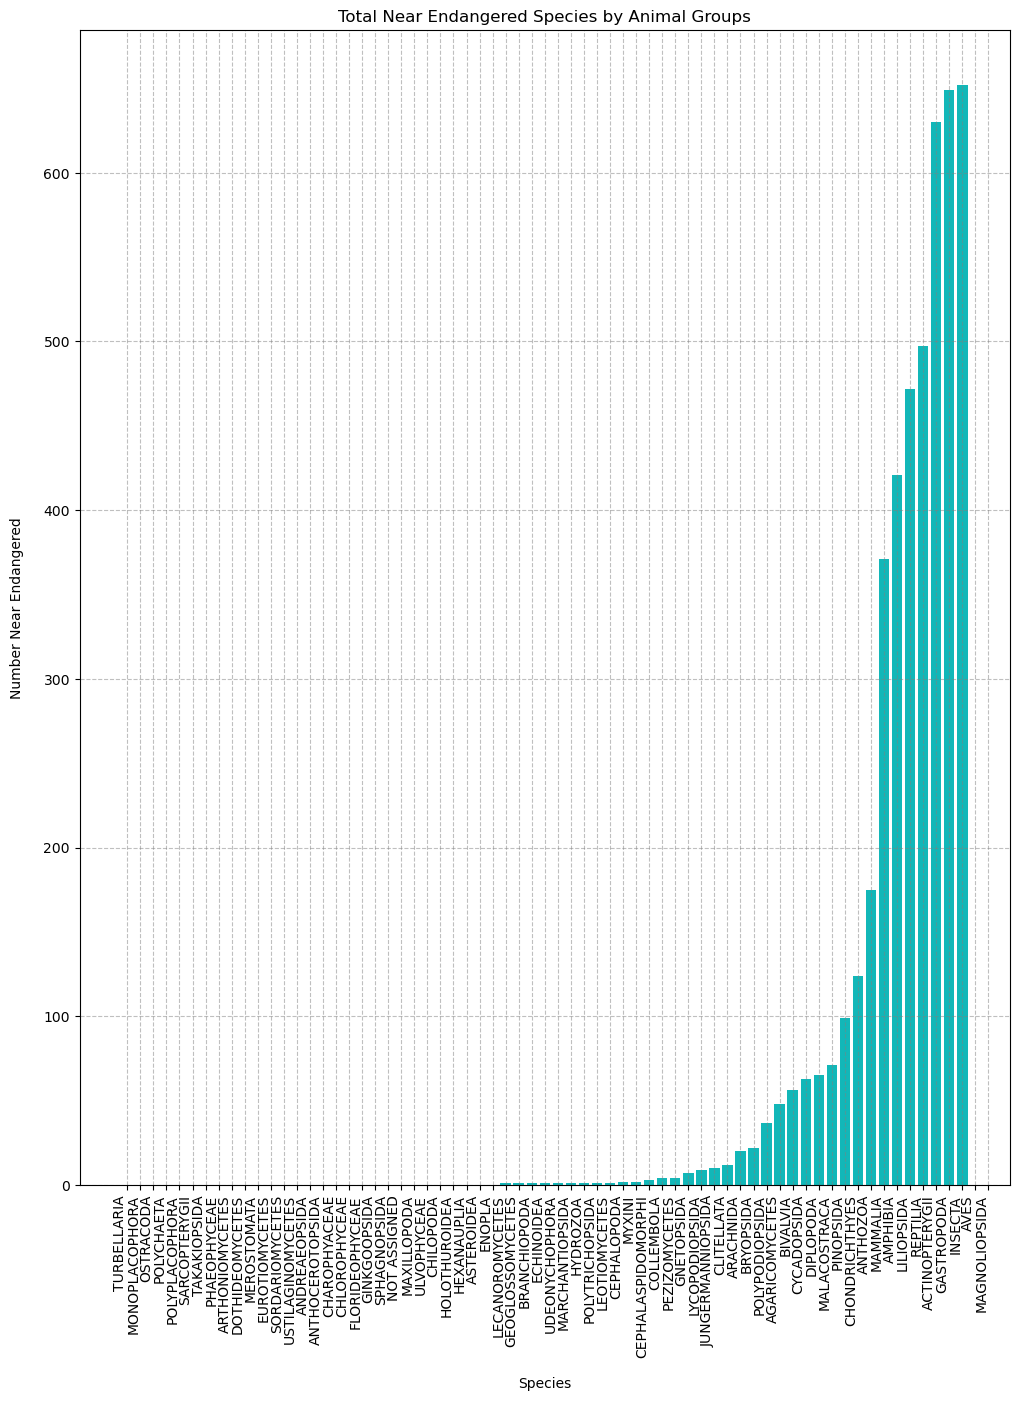

In [996]:
#CHATGPT helped me catch the error that was causing my data to display incorrect
#The issue was that there were some values that were not being considered numbers
#because they had commas or spaces.

rawDF["NT or LR/nt"] = pd.to_numeric(rawDF["NT or LR/nt"], errors="coerce")
sortedDF = rawDF.sort_values(by="NT or LR/nt", ascending=True)

species2 = sortedDF["Name"]
nearEndangered = sortedDF["NT or LR/nt"]

plt.figure(figsize=(12,15))

plt.bar(species2, nearEndangered, color = "#12B7B8")

#Setting titles and labels
plt.xlabel("Species", labelpad=14)
plt.ylabel("Number Near Endangered", labelpad=14)
plt.title("Total Near Endangered Species by Animal Groups")

#Adjusting x and y labels
plt.xticks(rotation=90, ha='right')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

plt.show()

VISUALIZATION #4

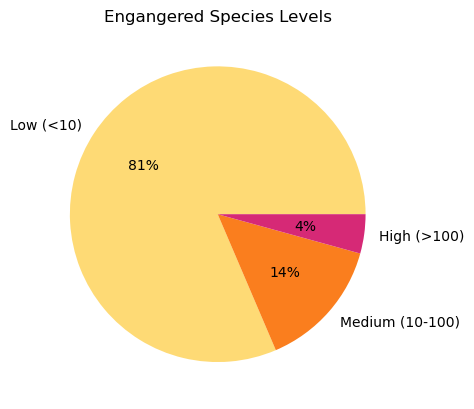

In [997]:
#CREDIT TO https://www.youtube.com/watch?v=0P7QnIQDBJY&list=RDCMUCq6XkhO5SZ66N04IcPbqNcw&index=2
conservNeededGroups = rawDF["Subtotal (EX+EW)"]

low = rawDF[conservNeededGroups < 10].count()[0]
medium = rawDF[conservNeededGroups > 10].count()[0]
high = rawDF[conservNeededGroups > 100].count()[0]
percents = [low, medium, high]

plt.title("Engangered Species Levels")

#CHATGPT HELPED ME ADD LABELS
labels = ["Low (<10)", "Medium (10-100)", "High (>100)"]

plt.pie(percents, labels=labels, 
        autopct='%1.0f%%',
        colors = ["#feda75", "#fa7e1e", "#d62976"])

plt.show()

VISUALIZATION #5

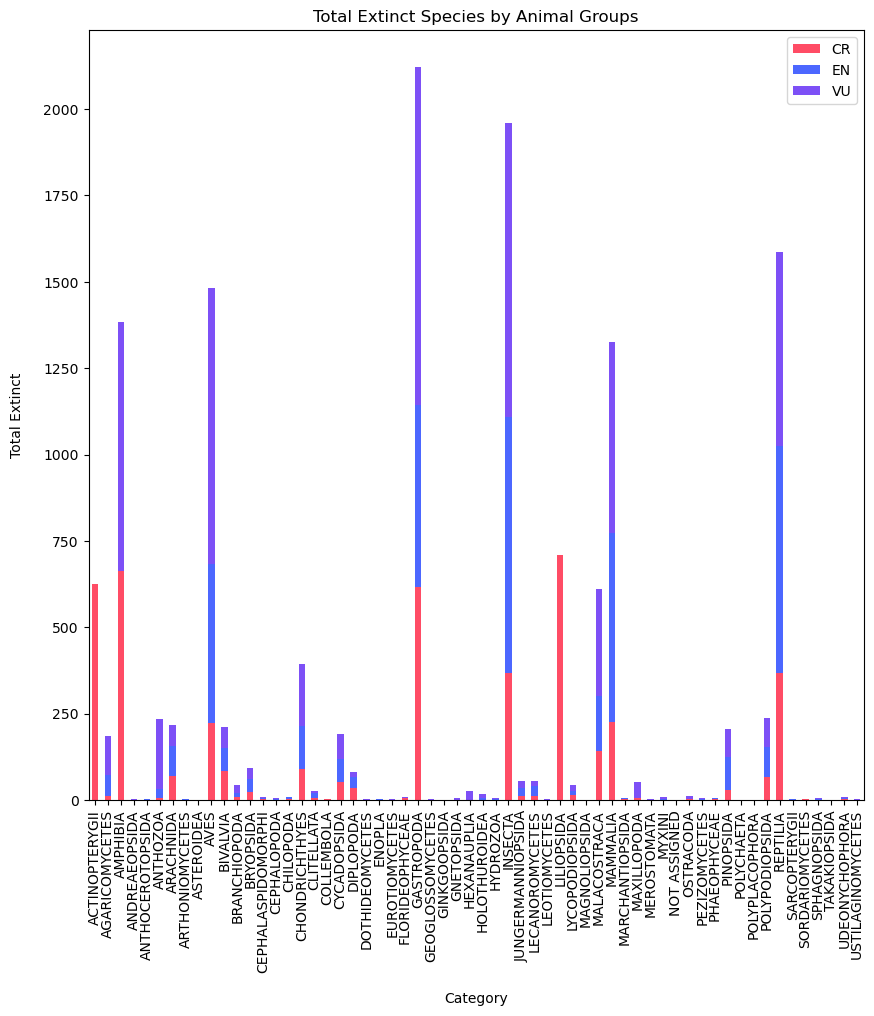

In [998]:
#CHATGPT recommended this type of chart for what I was trying to acheive.
#It also helped me form correct syntax and correct errors.

filteredDF = rawDF[(rawDF["CR"] != 0) & (rawDF["EN"] != 0) & (rawDF["VU"] != 0)]


#Next 3 Lines from ChatGPT for conversion
rawDF["CR"] = pd.to_numeric(rawDF["CR"], errors="coerce")
rawDF["EN"] = pd.to_numeric(rawDF["EN"], errors="coerce")
rawDF["VU"] = pd.to_numeric(rawDF["VU"], errors="coerce")

#this filter data line came from chatGPT
filteredDF = rawDF[(rawDF[["CR", "EN", "VU"]] != 0).any(axis=1)]
groupedValues = filteredDF.groupby("Name")[["CR","EN","VU"]].sum()
colors = ["#FF0024", "#0027FF","#4606F3"]

#plt.figure(figsize=(20,10))
groupedValues.plot(kind="bar", color = colors, stacked=True, alpha=0.7, figsize=(10,10))

#plt.bar(labels, categories)

plt.xlabel("Category", labelpad=14)
plt.ylabel("Total Extinct", labelpad=14)
plt.title("Total Extinct Species by Animal Groups")

plt.show()